# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

***

____
** Import numpy, pandas, visualization libraries and set %matplotlib inline. **

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

%matplotlib inline

## Data

We will use the stock data from Jan 1st 2006 to Jan 1st 2016 for each of the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
***

** Read in the pickle file as a dataframe called bank_stocks **

In [6]:
bank_stocks = pd.read_pickle('all_banks')

In [7]:
bank_stocks

Bank Ticker    BAC                                      C                  \
Stock Info    Open   High    Low  Close    Volume    Open    High     Low   
Date                                                                        
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.00  493.80  481.10   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.60  491.00  483.50   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.40  487.80  484.00   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.80  489.00  482.00   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.00  487.40  483.00   
...            ...    ...    ...    ...       ...     ...     ...     ...   
2015-12-24   17.32  17.38  17.22  17.27  29373415   52.48   52.97   52.45   
2015-12-28   17.22  17.23  16.98  17.13  41777497   52.57   52.57   51.96   
2015-12-29   17.25  17.35  17.16  17.28  45670376   52.76   53.22   52.74   
2015-12-30   17.20  17.24  17.04  17.05  35066378   52.84   52.94   52.25   
2015-12-31   17.01  17.07  16.83  16.83  47152968   52.07   52.39   51.75   

Bank Ticker                    ...     MS                                \
Stock Info    Close    Volume  ...   Open   High    Low  Close   Volume   
Date                           ...                                        
2006-01-03   492.90   1537660  ...  57.17  58.49  56.74  58.31  5377000   
2006-01-04   483.80   1871020  ...  58.70  59.28  58.35  58.35  7977800   
2006-01-05   486.20   1143160  ...  58.55  58.59  58.02  58.51  5778000   
2006-01-06   486.20   1370250  ...  58.77  58.85  58.05  58.57  6889800   
2006-01-09   483.90   1680740  ...  58.63  59.29  58.62  59.19  4144500   
...             ...       ...  ...    ...    ...    ...    ...      ...   
2015-12-24    52.71   4671254  ...  32.57  32.71  32.44  32.48  2798163   
2015-12-28    52.38   8761743  ...  32.36  32.36  31.95  32.17  5420280   
2015-12-29    52.98  10155134  ...  32.44  32.70  32.32  32.55  6388244   
2015-12-30    52.30   8763337  ...  32.50  32.64  32.20  32.23  5057162   
2015-12-31    51.75  11281771  ...  31.91  32.30  31.77  31.81  8154307   

Bank Ticker    WFC                                 
Stock Info    Open   High    Low  Close    Volume  
Date                                               
2006-01-03   31.60  31.98  31.20  31.90  11016400  
2006-01-04   31.80  31.82  31.36  31.53  10871000  
2006-01-05   31.50  31.56  31.31  31.50  10158000  
2006-01-06   31.58  31.78  31.38  31.68   8403800  
2006-01-09   31.68  31.82  31.56  31.68   5619600  
...            ...    ...    ...    ...       ...  
2015-12-24   54.97  55.09  54.71  54.82   4999417  
2015-12-28   54.55  54.78  54.17  54.68   8288841  
2015-12-29   55.11  55.35  54.99  55.29   7894876  
2015-12-30   55.27  55.31  54.79  54.89   8016893  
2015-12-31   54.51  54.95  54.22  54.36  10929767  

[2517 rows x 30 columns]

In [8]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [10]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Check the columns names of the bank_stocks dataframe**

In [11]:
bank_stocks.columns.names

FrozenList(['Bank Ticker', 'Stock Info'])

** Check the head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA


***
** What is the max Close price for each bank's stock throughout the time period?**

In [13]:
bank_stocks["BAC"]["Close"].max()

54.9

In [14]:
for tick in tickers:
    print(tick +":"+ str(bank_stocks[tick]["Close"].max()))

BAC:54.9
C:564.1
GS:247.92
JPM:70.08
MS:89.3
WFC:58.52


In [15]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. **



In [19]:
returns = pd.DataFrame()
returns

""


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [20]:
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]["Close"].pct_change()

In [22]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

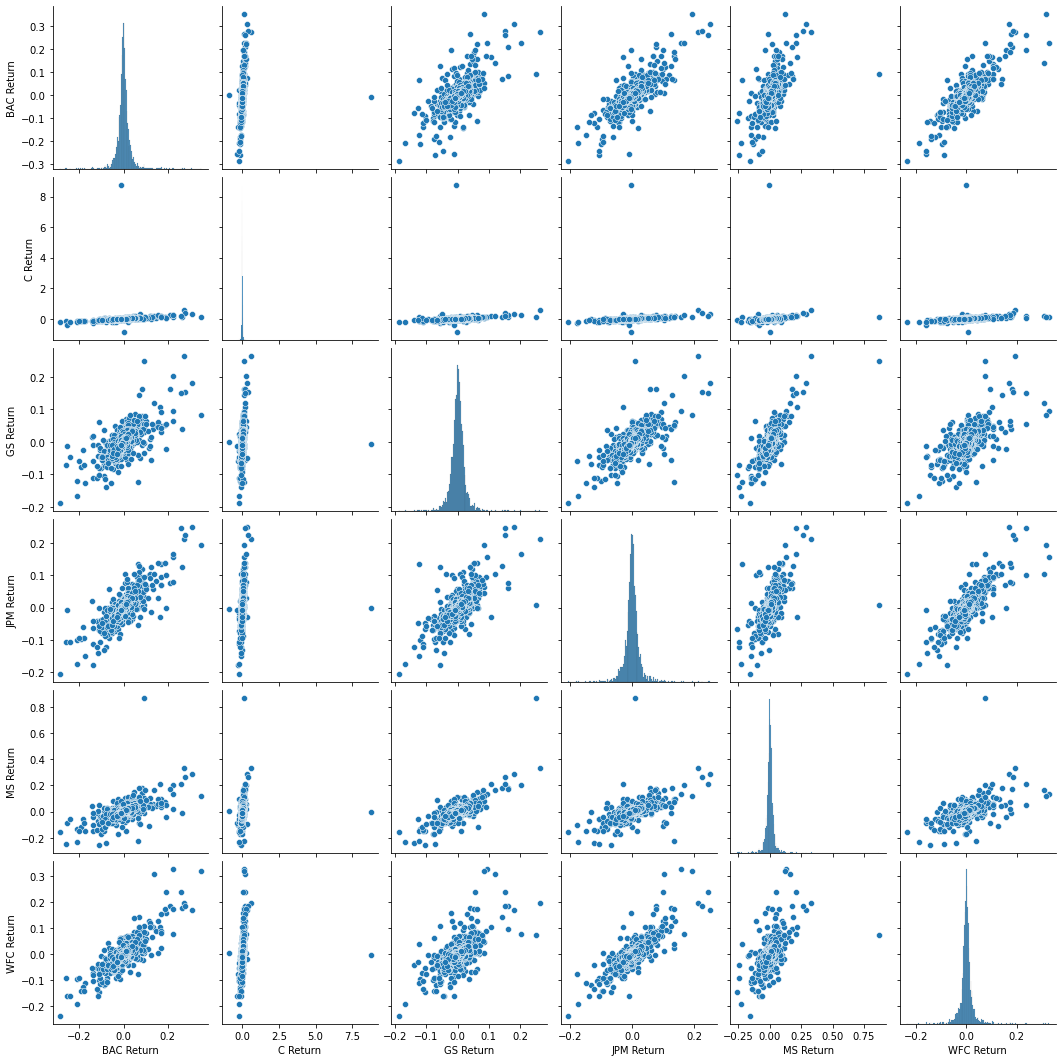

In [23]:
sns.pairplot(returns);

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [24]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [25]:
returns["BAC Return"].idxmin()

# Series.idxmax()  : Return index label of the maximum values.
# Series.idxmin()  : Return index label of the minimum values.

# Series.argmin()  : Return position of the minimum value.
# Series.argmax()  : Return position of the maximum value.

Timestamp('2009-01-20 00:00:00')

In [26]:
returns.idxmin()

# df.idxmin()   : Return the index for the minimum value in each column.

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [27]:
returns.idxmax()

# df.idxmax()   : Return the index for the maximum value in each column.

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

* You should have noticed that Citigroup's largest drop and biggest gain were very close to one another. **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [28]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [29]:
returns.loc["2015-01-01":"2015-12-31",].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [30]:
returns.loc["2015-01-01":"2015-12-31",]["MS Return"]

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Return, Length: 252, dtype: float64

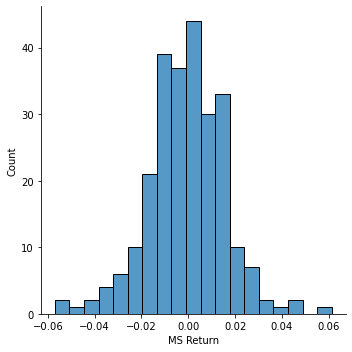

In [31]:
sns.displot(x=returns.loc["2015-01-01":"2015-12-31",]["MS Return"], data=returns);

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

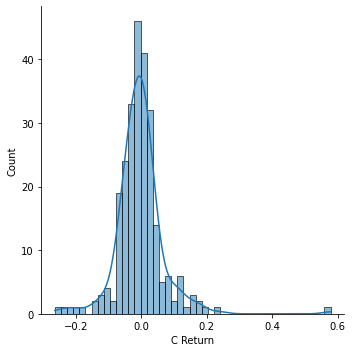

In [32]:
sns.displot(x=returns.loc["2008-01-01":"2008-12-31",]["C Return"], data=returns, kde = True);

____
# More Visualization

A lot of this project will focus on visualizations. We will use any of our preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

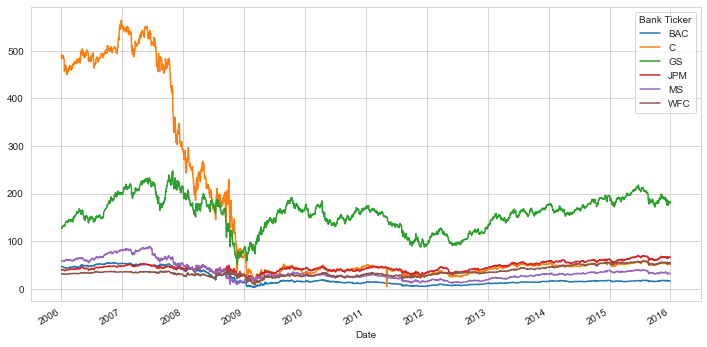

In [39]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").plot(figsize=(12,6));

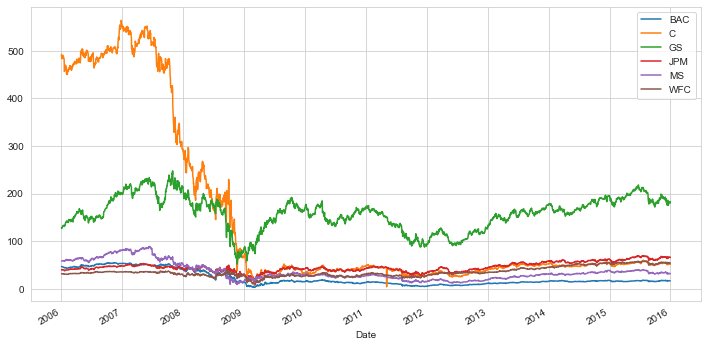

In [40]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(label = tick, figsize= (12,6))
    plt.legend()

In [36]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").iplot();

## Moving Averages

Analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

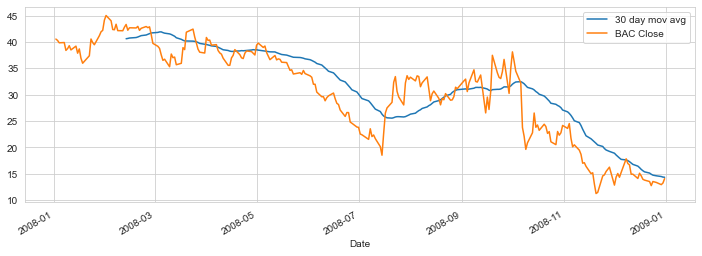

In [41]:
plt.figure(figsize=(12,4))
bank_stocks["BAC"].Close.loc["2008-01-01":"2008-12-31",].rolling(30).mean().plot(label="30 day mov avg")
bank_stocks["BAC"].Close.loc["2008-01-01":"2008-12-31",].plot(label = "BAC Close")
plt.legend();

** Create a heatmap of the correlation between the stocks Close Price.**

In [42]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


In [43]:
bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr().head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864


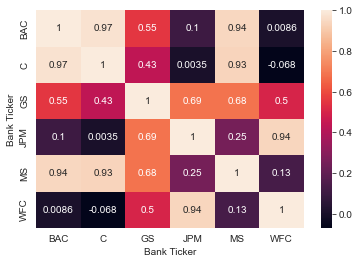

In [44]:
sns.heatmap(bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr(), annot = True);

** Use seaborn's clustermap to cluster the correlations together:**

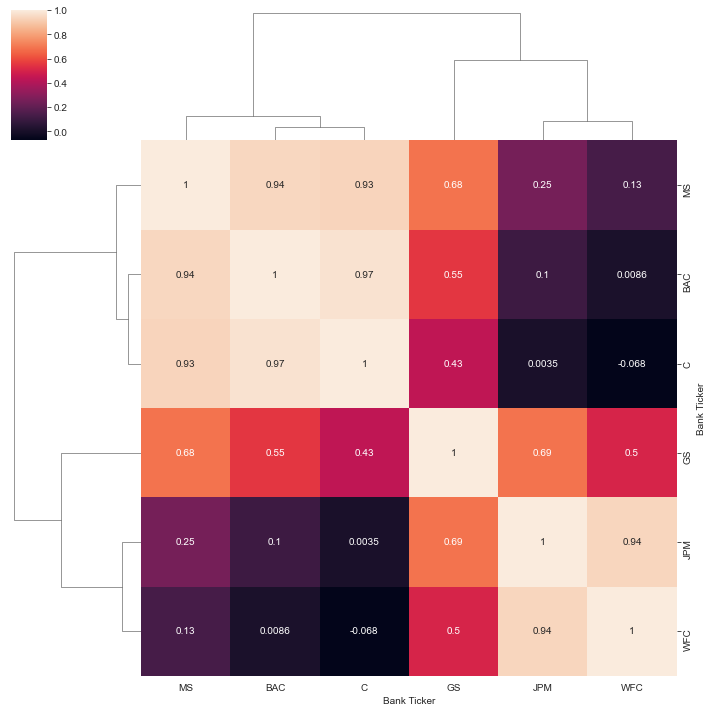

In [186]:
sns.clustermap(bank_stocks.xs(key = "Close", axis = 1, level = "Stock Info").corr(), annot = True);

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. 

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [45]:
bank_stocks["BAC"].loc["2015-01-01":"2016-01-01",].iplot(kind = "candle")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [48]:
bank_stocks["MS"].head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,57.17,58.49,56.74,58.31,5377000
2006-01-04,58.70,59.28,58.35,58.35,7977800
2006-01-05,58.55,58.59,58.02,58.51,5778000
2006-01-06,58.77,58.85,58.05,58.57,6889800
2006-01-09,58.63,59.29,58.62,59.19,4144500


In [49]:
bank_stocks["MS"].Close.loc["2015-01-01":"2015-12-31",].ta_plot(study='sma')

** Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [50]:
bank_stocks["BAC"].Close.loc["2015-01-01":"2015-12-31",].ta_plot(study='boll')

# Great Job!

